<a href="https://colab.research.google.com/github/vianelk/ai_financial_track/blob/main/AI_detect_financial_bankrupt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI DETECTION OF COMPAGNY'S BANKRUPT

In [1]:
!pip install dataiku-api-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dataiku-api-client: filename=dataiku_api_client-13.4.1-py3-none-any.whl size=355713 sha256=f1d46c85148c26b4203588fa452e94cf50fb723a2b938e7e515fbd6552ba7738
  Stored in directory: /root/.cache/pip/wheels/25/4e/e8/c5a2af4ea717e6b80141a390507cf2255b9b911b84af31783b
Successfully built dataiku-api-client


## IMPORT OF LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataikuapi as dataiku

## IMPORT OF DATASET

In [3]:
dataiku_url = 'https://dss-c8b1fb04-e440c9ef-dku.eu-west-3.app.dataiku.io/'
dataiku_api_key = 'dkuaps-9zHDQVbaVOXD18Rfp2Y3O15dbVV3az0E'
dataiku_project_name = 'AI_FINANCIAL_TRACK'
dataiku_dataset_name = 'data_filtered'

In [4]:
def get_dataiku_project(dataiku_url, dataiku_api_key, project_name):
    external_client = dataiku.DSSClient(dataiku_url, dataiku_api_key)
    project = external_client.get_project(project_name)
    return project

In [5]:
def get_dataiku_dataset(project, dataset_name):
    dataset = project.get_dataset(dataset_name)
    # Récupérer le schéma pour obtenir les noms des colonnes
    schema = dataset.get_schema()
    column_names = [col['name'] for col in schema['columns']]
    # Récupérer les données ligne par ligne
    rows = []
    for row in dataset.iter_rows():
        rows.append(row)
    # Convertir les données en DataFrame avec les colonnes
    df = pd.DataFrame(rows, columns=column_names)

    return df

In [6]:
projet = get_dataiku_project(dataiku_url, dataiku_api_key, dataiku_project_name)
df = get_dataiku_dataset(projet, dataiku_dataset_name)

df

,net_income_to_total_assets,total_income_total_expense,borrowing_dependency,retained_earnings_to_total_assets,total_debt_total_net_worth,bankrupt
0,0.716845,0.002022,0.390284,0.903225,0.021266,1.0
1,0.795297,0.002226,0.376760,0.931065,0.012502,1.0
2,0.774670,0.002060,0.379093,0.909903,0.021248,1.0
3,0.739555,0.001831,0.379743,0.906902,0.009572,1.0
4,0.795016,0.002224,0.375025,0.913850,0.005150,1.0
...,...,...,...,...,...,...
6814,0.799927,0.002266,0.373823,0.925611,0.006655,0.0
6815,0.799748,0.002288,0.372505,0.932629,0.004623,0.0
6816,0.797778,0.002239,0.369637,0.932000,0.001392,0.0
6817,0.811808,0.002395,0.369649,0.939613,0.003816,0.0


## DATA TRANSFORMATION


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   net_income_to_total_assets         6819 non-null   float64
 1   total_income_total_expense         6819 non-null   float64
 2   borrowing_dependency               6819 non-null   float64
 3   retained_earnings_to_total_assets  6819 non-null   float64
 4   total_debt_total_net_worth         6819 non-null   float64
 5   bankrupt                           6819 non-null   float64
dtypes: float64(6)
memory usage: 319.8 KB


### FIABALITE DE LA DONNEE: VERIFICATION



In [13]:
#Vérification de valeurs nulles dans le dataset
df.isnull().sum()

,0
net_income_to_total_assets,0
total_income_total_expense,0
borrowing_dependency,0
retained_earnings_to_total_assets,0
total_debt_total_net_worth,0
bankrupt,0


In [14]:
#Recherche de colonne en double
df.duplicated().sum()

0

In [15]:
# Recherche de valeur NAN
[print(col) for col in df if df[col].isna().sum() > 0]

[]

## DATA EXPLORATION

**X86 - Net Income to Total Assets (Rentabilité des actifs)**
<br>→ Mesure le profit net par rapport aux actifs.
<br>✔ Élevé = Bonne rentabilité et efficacité.
<br>✖ Faible/Négatif = Risque de faillite.

<br>**X69 - Total income / Total expense (Revenus / Dépenses)**
<br>→ Compare les revenus aux dépenses.
<br>✔ > 1 = Entreprise viable.
<br>✖ < 1 = Dépenses supérieures aux revenus, risque de pertes.

<br>**X40 - Borrowing dependency (Dépendance aux emprunts)**
<br>→ Indique la part des coûts financiers liée aux emprunts.
<br>✔ Faible = Moins de risque financier.
<br>✖ Élevé = Forte dépendance, risque accru en cas de baisse de revenus.

<br**>X68 - Retained Earnings to Total Assets (Bénéfices non répartis / Actifs)**
<br>→ Montre combien des actifs sont financés par les bénéfices passés.
<br>✔ Élevé = Stabilité financière.
<br>✖ Faible = Forte dépendance aux emprunts/investisseurs.

<br>**X36 - Total debt / Total net worth (Ratio d’endettement)**
<br>→ Compare la dette totale aux fonds propres.
<br>✔ Faible = Bonne solidité financière.
<br>✖ Élevé = Flexibilité financière réduite, risque accru en cas de crise.

In [17]:
# Sélection des colonnes d'intérêt avec les nouveaux noms
selected_columns = [
    "net_income_to_total_assets",
    "total_income_total_expense",
    "borrowing_dependency",
    "retained_earnings_to_total_assets",
    "total_debt_total_net_worth"
]

df_selected = df[selected_columns]

In [18]:
# Affichage des statistiques descriptives
stats_desc = df_selected.describe()
print("Statistiques descriptives :\n", stats_desc)

Statistiques descriptives :
        net_income_to_total_assets  total_income_total_expense  \
count                 6819.000000                 6819.000000   
mean                     0.807760                    0.002549   
std                      0.040332                    0.012093   
min                      0.000000                    0.000000   
25%                      0.796750                    0.002236   
50%                      0.810619                    0.002336   
75%                      0.826455                    0.002492   
max                      1.000000                    1.000000   

       borrowing_dependency  retained_earnings_to_total_assets  \
count           6819.000000                        6819.000000   
mean               0.374654                           0.934733   
std                0.016286                           0.025564   
min                0.000000                           0.000000   
25%                0.370168                           0

**Net_Income_to_Total_Assets (Rentabilité des actifs)**
<br>→ Moyenne : 0.8077 (80% des actifs en revenu net)
<br>→ Peu de variation, certaines entreprises à 0, d’autres à 1.
<br>
<br>**Total_income_Total_expense (Revenus vs Dépenses)**
<br>→ Moyenne : 0.0025 (revenus ≈ dépenses)
<br>→ Variabilité élevée, certaines entreprises équilibrées, d’autres déficitaires.
<br>
<br>**Borrowing_dependency (Dépendance aux emprunts)**
<br>→ Moyenne : 37% des coûts financiers liés à la dette
<br>→ Faible variation, certaines entreprises sans dette, d’autres totalement dépendantes.
<br>
<br>**Retained_Earnings_to_Total_Assets (Bénéfices non répartis)**
<br>→ Moyenne : 93% des actifs financés en interne
<br>→ Stabilité forte, mais certaines entreprises sans bénéfices accumulés.
<br>
<br>**Total_debt_Total_net_worth (Ratio d’endettement)**
<br>→ Moyenne : 4.4M, Le ratio d'endettement moyen est très élevé
<br>→ Certaines entreprises sans dette, d’autres extrêmement endettées.

<Figure size 1200x600 with 0 Axes>

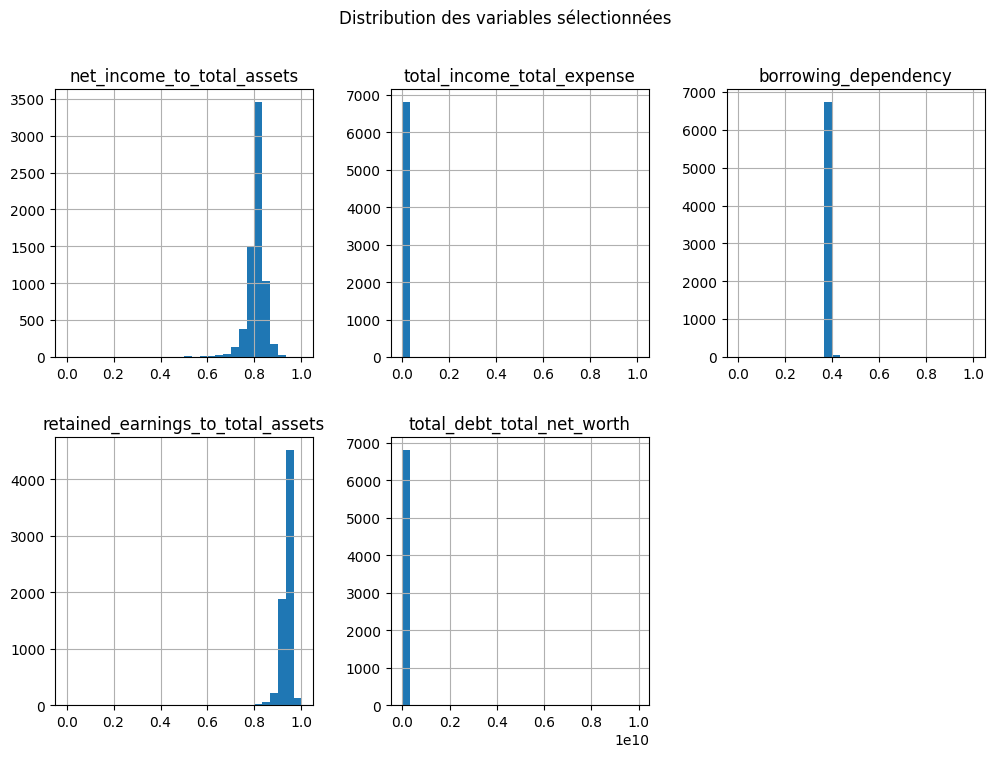

In [19]:
# Visualisation des distributions (Histogrammes)
plt.figure(figsize=(12, 6))
df_selected.hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distribution des variables sélectionnées")
plt.show()

**Interpretation**


*   **Net Income to Total Assets** : La majorité des entreprises ont un ratio compris entre 0.75 et 0.85, ce qui montre une forte concentration autour d’une rentabilité stable.

*   **Total income / Total expense** : La distribution est très asymétrique, avec une majorité d'entreprises ayant un ratio très faible.


*   **Borrowing dependency**: La plupart des entreprises ont une dépendance aux emprunts concentrée autour de 0.37.

*   **Retained Earnings to Total Assets** : La plupart des entreprises financent presque 100% de leurs actifs avec leurs bénéfices.


*   **Total debt / Total net worth** : Cette variable a une dispersion plus large, avec certaines entreprises ayant des niveaux de dette extrêmement élevés, ce qui peut indiquer des risques financiers importants.

In [20]:
# Détection des corrélations (Evite redondance, identifie les tendances)
correlation_matrix = df_selected.corr()

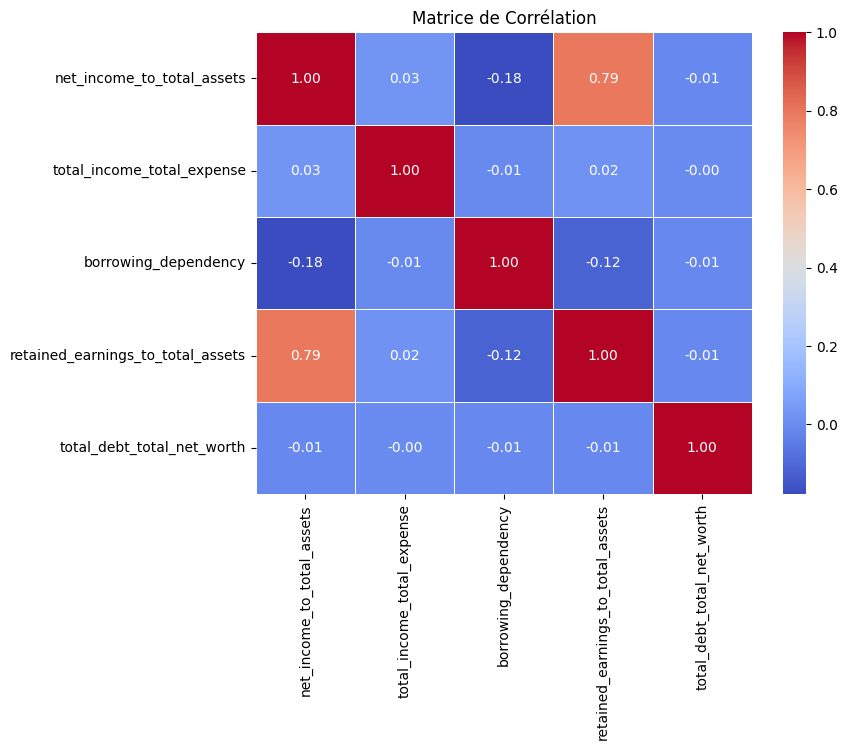

In [21]:
# Heatmap des corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

**Conclusion**: Les entreprises les plus performantes sont celles qui :

*   Réduisent leurs coûts fixes pour augmenter la rentabilité
*   Évitent une trop forte dépendance aux emprunts.
*   Réduisent leurs coûts fixes pour augmenter la rentabilité.
